# Import Dependencies

In [4]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib pandas pyarrow

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/67/4c/569cbb27c6b1e09c7c088ca1e7ce88573dfb9769cfc79ebeacdab0f6903d/mediapipe-0.10.11-cp311-cp311-win_amd64.whl.metadata
  Using cached mediapipe-0.10.11-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/dc/d9/f387d9dfb2cf00f814b24e0f8bf6f4c68ae01870994dc436993fadd73563/jax-0.4.26-py3-none-any.whl.metadata
  Using cached jax-0.4.26-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for sounddevice>=0.4.4 from https://files.pythonhosted.org/packages/39/ae/5e84220bfca4256e4ca2a62a174636089ab6ff671b5f9ddd7e8238587acd/sounddevice-0.4.6-py3-none-win_amd64.whl.metadata
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl.metadata (1.4 kB)
Using cached mediapipe-0.10.11-cp311-cp311-win_amd64.whl (50.8 MB)
Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
Using cached jax-0.4.26-py3-none-

In [5]:
import numpy as np
import cv2 as cv
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pandas as pd
import tensorflow as tf

## Setup Mediapipe

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results): 
    # Draw face connections 
    mp_drawing.draw_landmarks( 
      image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
      mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),  
      mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))  
    # Draw pose connections 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2) 
                             )  
    # Draw left hand connections 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2) 
                             )  
    # Draw right hand connections   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),  
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                             )  

# Start Video

### Video Without Mediapipe Speed

In [9]:
cap = cv.VideoCapture('vid_test/test_vid.mp4')

new_width = 680
new_height = 480
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        cap.set(cv.CAP_PROP_POS_FRAMES, 0)
        continue
    #resize frameq
    resized_frame = cv.resize(frame, (new_width, new_height))
    start_time = time.time()
    gray = cv.cvtColor(resized_frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame', gray)
    end_time = time.time()
    processing_time = end_time - start_time
    print(f"Frame {frame_counter}, FPS: {1/processing_time:.2f}")

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

## Video with MediaPipe
### First: Without frame-skip

In [74]:
#vid_folder = 'vid_test'
#vid_filename = 'sorry.mp4'
#vid_path = os.path.join(vid_folder, vid_filename);
#fourcc = cv2.VideoWriter_fourcc(*'mp4v')

cap = cv.VideoCapture('vid_test/test_vid.mp4')

new_width = 680
new_height = 480
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()
        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            cap.set(cv.CAP_PROP_POS_FRAMES, 0)
            continue
            
        #resize frame
        resized_frame = cv.resize(frame, (new_width, new_height))
        
        # Start the timer
        start_time = time.time()
    
        image, results = mediapipe_detection(resized_frame, holistic)
        #print(results)
    
        #draw landmarks
        draw_styled_landmarks(image,results)
    
        #gray = cv.cvtColor(resized_frame, cv.COLOR_BGR2GRAY)
        cv.imshow('frame', image)
        
        # Stop the timer, end of frame
        end_time = time.time()
        processing_time = end_time - start_time
        print(f"Frame {frame_counter}, FPS: {1/processing_time:.2f}")

    
        if cv.waitKey(1) == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

Frame 207, FPS: 3.43
Frame 207, FPS: 11.02
Frame 207, FPS: 10.84
Frame 207, FPS: 11.65
Frame 207, FPS: 11.57
Frame 207, FPS: 11.04
Frame 207, FPS: 11.09
Frame 207, FPS: 11.60
Frame 207, FPS: 11.52
Frame 207, FPS: 11.60
Frame 207, FPS: 10.61
Frame 207, FPS: 11.48
Frame 207, FPS: 10.93
Frame 207, FPS: 10.54
Frame 207, FPS: 10.73
Frame 207, FPS: 10.72
Frame 207, FPS: 11.73
Frame 207, FPS: 10.67
Frame 207, FPS: 10.97
Frame 207, FPS: 10.55
Frame 207, FPS: 11.70
Frame 207, FPS: 11.04
Frame 207, FPS: 11.11
Frame 207, FPS: 11.13
Frame 207, FPS: 11.26
Frame 207, FPS: 11.02
Frame 207, FPS: 10.84
Frame 207, FPS: 10.78
Frame 207, FPS: 11.50
Frame 207, FPS: 11.71
Frame 207, FPS: 11.37
Frame 207, FPS: 11.41
Frame 207, FPS: 10.87
Frame 207, FPS: 11.64
Frame 207, FPS: 11.29
Frame 207, FPS: 11.37
Frame 207, FPS: 11.63
Frame 207, FPS: 11.16
Frame 207, FPS: 11.46
Frame 207, FPS: 11.77
Frame 207, FPS: 11.33
Frame 207, FPS: 10.87
Frame 207, FPS: 11.62
Frame 207, FPS: 11.17
Frame 207, FPS: 11.53
Frame 207, 

### With Frame Skip
To reduce the computational load. Frame skip methodology is introduced. Compare the above version with this version of speed.

In [6]:
video_path = 'bsl-dictionary-dataset/thanks/thanks_id1.mp4'
cap = cv.VideoCapture(video_path)

# Set the new width and height for resizing
new_width = 680
new_height = 480

# Define the frame skip factor (process every Nth frame)
frame_skip = 9  # Adjust as needed

# Initialize a frame counter
frame_counter = 0

# Create a MediaPipe Holistic object
#Faster inference if model complexity to 0. 1 -> lower inference. 
# train in model complexity of 1 and then change to 0?
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=0) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        # if frame is read correctly, ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            cap.set(cv.CAP_PROP_POS_FRAMES, 0)
            continue

        # Increment the frame counter
        frame_counter += 1

        # Skip frames if the frame counter is not divisible by the frame_skip factor
        if frame_counter % frame_skip != 0:
            continue

        # Resize the frame
        resized_frame = cv.resize(frame, (new_width, new_height))
        
        # Start the timer
        start_time = time.time()
        
        # Perform holistic pose detection on the resized frame
        image, results = mediapipe_detection(resized_frame, holistic)

        # Draw landmarks on the frame
        draw_styled_landmarks(image, results)

        # Display the processed frame
        cv.imshow('frame', image)
        
        # Stop the timer, end of frame
        end_time = time.time()
        processing_time = end_time - start_time
        print(f"Frame {frame_counter}, PT: {1/processing_time:.4f}")

        # Break the loop if the 'q' key is pressed
        if cv.waitKey(1) == ord('q'):
            break

    # Release the video capture object
    cap.release()

    # Close all OpenCV windows
    cv.destroyAllWindows()

Frame 9, PT: 1.9876
Frame 18, PT: 15.8077
Frame 27, PT: 16.2114
Frame 36, PT: 15.7668
Can't receive frame (stream end?). Exiting ...
Frame 45, PT: 16.0357
Frame 54, PT: 3.1606
Frame 63, PT: 13.5733
Frame 72, PT: 14.6855
Frame 81, PT: 15.9986
Can't receive frame (stream end?). Exiting ...
Frame 90, PT: 15.3373
Frame 99, PT: 17.3627
Frame 108, PT: 16.5309
Frame 117, PT: 15.7528
Frame 126, PT: 17.3172
Can't receive frame (stream end?). Exiting ...
Frame 135, PT: 16.2901
Frame 144, PT: 17.7172
Frame 153, PT: 16.3539
Frame 162, PT: 16.1834
Frame 171, PT: 16.0520
Can't receive frame (stream end?). Exiting ...
Frame 180, PT: 16.7152
Frame 189, PT: 16.6322
Frame 198, PT: 17.3037
Frame 207, PT: 15.0969
Can't receive frame (stream end?). Exiting ...
Frame 216, PT: 16.5565
Frame 225, PT: 18.1622
Frame 234, PT: 16.1401


Other optimization techniques:
- lower frame size (smaller processing of data)
- hardware acceleration (GPU Acceleration) 
- Threading (cautious!)
- Model Quantization
- Profilling tools to identify bottlenecks
- Optimize image processing step to reduce computational load

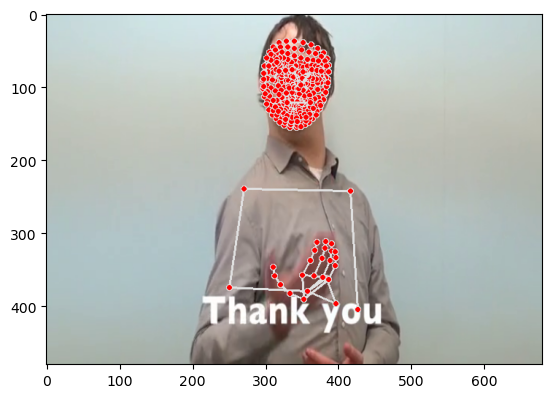

In [7]:
draw_landmarks(resized_frame, results)
# show the landmark taken
plt.imshow(cv.cvtColor(resized_frame, cv.COLOR_BGR2RGB))

Clearly it is shown that the face has lots of unneccessary landpoints that could incur additional computational logic. 
-> Map so that key points occur?

# Extracting Keypoint Values to Matrix

In [8]:
#
#empty array to store keypoint arrays for each frame.

In [9]:
len(results.pose_landmarks.landmark) #outputs number of face landmarks. 


33

Based oon len. Clearly, there is 33 points for pose, 21 points for both hands, and 468 landmarks for face.

IF: camera didn't pick up then add in zeros to the numpy array. This ensures the array can still be fed into the machine learning even if it is not shown.

In [10]:
pose = []
##Put the landmark coordinates in the array via loop.
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test) ##put test content into pose array.

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()  if results.face_landmarks  else np.zeros(1404)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
#to match google dataset- get rid of visibility
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test.shape

(1629,)

In [17]:
np.save('test_vid_matrix', result_test)

In [18]:
np.load('test_vid_matrix.npy')

array([ 0.51351529,  0.20527034, -0.67330414, ...,  0.58349681,
        0.67986459, -0.05634594])

# Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
#data path is at folder of MP_Data
DATA_PATH = os.path.join('MP_Vid_Data_Clean') 

# Actions that we try to detect
#experiment with 2 at the start. up to 10 words later
actions = np.array(['thanks', 'sorry'])

# 50 videos worth of data
no_sequences = 100

# Videos are going to be 26 frames in length
sequence_length = 5

# Folder start
start_folder = 30

In [25]:
## create folders for each sequence in each signs.
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Collect Keypoint from Videos

In [20]:
dataset_folder = "manual-script"
# Path for exported data, numpy arrays

collect keyframes in videos regardless of length. Extracted keypoints is saved in folder accordingly.

In [20]:

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action_folder in os.listdir(dataset_folder):
        action_path = os.path.join(dataset_folder, action_folder)
        if os.path.isdir(action_path) and action_folder in actions:
            print(f"Processing action: {action_folder}")
            sequence_counter = 0
            for video_file in os.listdir(action_path):
                if video_file.endswith(".mp4"):
                    video_path = os.path.join(action_path, video_file)
                    print(f"Processing video: {video_file}")
                    cap = cv.VideoCapture(video_path)
                    frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
                    frame_selection_interval = max(1, frame_count // 30)

                    try:
                        os.makedirs(os.path.join(DATA_PATH, action_folder, str(sequence_counter)))
                    except:
                        pass

                    frame_num = 0
                    selected_frames = 0
                    while cap.isOpened() and selected_frames < 30:
                        ret, frame = cap.read()
                        if not ret:
                            break
                        if frame_num % frame_selection_interval == 0 or selected_frames == 29:  # Ensure exactly 30 frames are collected
                            image, results = mediapipe_detection(frame, holistic)
                            draw_styled_landmarks(image, results)
                            #cv.imshow('OpenCV Feed', image)  # Display the frame being processed
                            keypoints = extract_keypoints(results)
                            npy_path = os.path.join(DATA_PATH, action_folder, str(sequence_counter), f"{selected_frames}.npy")
                            np.save(npy_path, keypoints)
                            print(f"Saved keypoints to: {npy_path}")
                            selected_frames += 1
                            if cv.waitKey(10) & 0xFF == ord('q'):  # Press 'q' to exit early
                                break
                        frame_num += 1

                    cap.release()
                    cv.destroyAllWindows()
                    sequence_counter += 1

Processing action: thanks
Processing video: thanks_38.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\0\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\0\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\0\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\0\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\0\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\0\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\0\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\0\7.npy
Processing video: thanks_01.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\1\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\1\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\1\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\1\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\1\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\1\5.npy
Processing video: thanks_02.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\2\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\2\1.npy
Saved keypoints to: MP_Vid_Dat

Saved keypoints to: MP_Vid_Data_Clean\thanks\9\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\9\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\9\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\9\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\9\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\9\17.npy
Processing video: thanks_10.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\7.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\8.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\9.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\10.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\10\1

Saved keypoints to: MP_Vid_Data_Clean\thanks\21\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\21\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\21\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\21\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\21\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\21\5.npy
Processing video: thanks_19.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\7.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\22\8.npy
Processing video: thanks_20.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\23\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\23\1.npy
Saved keypoints to

Saved keypoints to: MP_Vid_Data_Clean\thanks\32\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\17.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\18.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\19.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\20.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\21.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\22.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\23.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\24.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\25.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\26.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\27.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\28.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\32\29.npy
Processing video: thanks_29.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\33\0.npy
Saved keypoints to: MP_Vid_Data_Cl

Saved keypoints to: MP_Vid_Data_Clean\thanks\44\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\44\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\44\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\44\7.npy
Processing video: thanks_45.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\45\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\45\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\45\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\45\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\45\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\45\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\45\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\45\7.npy
Processing video: thanks_46.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\46\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\46\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\46\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\46\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\46\4.npy
Saved keypoints to

Saved keypoints to: MP_Vid_Data_Clean\thanks\58\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\7.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\8.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\9.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\10.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\11.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\17.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\18.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\19.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\58\20.npy
Saved keypoints t

Saved keypoints to: MP_Vid_Data_Clean\thanks\63\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\7.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\8.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\9.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\10.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\11.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\17.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\18.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\63\19.npy
Saved keypoints to

Saved keypoints to: MP_Vid_Data_Clean\thanks\68\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\7.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\8.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\9.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\10.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\11.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\68\17.npy
Saved keypoints to: 

Saved keypoints to: MP_Vid_Data_Clean\thanks\73\11.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\17.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\18.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\19.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\20.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\21.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\22.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\23.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\24.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\25.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\26.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\27.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\73\28.npy
Saved keyp

Saved keypoints to: MP_Vid_Data_Clean\thanks\78\8.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\9.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\10.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\11.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\17.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\18.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\19.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\20.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\21.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\22.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\23.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\24.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\78\25.npy
Saved keypoi

Saved keypoints to: MP_Vid_Data_Clean\thanks\83\11.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\17.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\18.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\19.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\20.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\21.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\22.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\23.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\24.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\25.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\26.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\27.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\83\28.npy
Saved keyp

Saved keypoints to: MP_Vid_Data_Clean\thanks\88\17.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\18.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\19.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\20.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\21.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\22.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\23.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\24.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\25.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\26.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\27.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\28.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\88\29.npy
Processing video: thanks_84.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\89\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\89\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\89\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\89\3.npy
Saved keypoints to: MP_Vid_Data_Clean

Processing video: thanks_90.mp4
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\0.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\1.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\2.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\3.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\4.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\5.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\6.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\7.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\8.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\9.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\10.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\11.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\94\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thank

Saved keypoints to: MP_Vid_Data_Clean\thanks\99\11.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\12.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\13.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\14.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\15.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\16.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\17.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\18.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\19.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\20.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\21.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\22.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\23.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\24.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\25.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\26.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\27.npy
Saved keypoints to: MP_Vid_Data_Clean\thanks\99\28.npy
Saved keyp

Saved keypoints to: MP_Vid_Data_Clean\sorry\11\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\11\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\11\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\11\7.npy
Processing video: sorry_10.mp4
Saved keypoints to: MP_Vid_Data_Clean\sorry\12\0.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\12\1.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\12\2.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\12\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\12\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\12\5.npy
Processing video: sorry_11.mp4
Saved keypoints to: MP_Vid_Data_Clean\sorry\13\0.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\13\1.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\13\2.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\13\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\13\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\13\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\13\6.npy
Saved keypoints to: MP_Vid_Data_Clean

Saved keypoints to: MP_Vid_Data_Clean\sorry\22\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\22\12.npy
Processing video: sorry_21.mp4
Saved keypoints to: MP_Vid_Data_Clean\sorry\23\0.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\23\1.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\23\2.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\23\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\23\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\23\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\23\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\23\7.npy
Processing video: sorry_22.mp4
Saved keypoints to: MP_Vid_Data_Clean\sorry\24\0.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\24\1.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\24\2.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\24\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\24\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\24\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\24\6.npy
Saved keypoints to: MP_Vid_Data_Cle

Saved keypoints to: MP_Vid_Data_Clean\sorry\33\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\33\4.npy
Processing video: sorry_32.mp4
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\0.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\1.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\2.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\34\15.npy
Saved key

Saved keypoints to: MP_Vid_Data_Clean\sorry\44\22.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\44\23.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\44\24.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\44\25.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\44\26.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\44\27.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\44\28.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\44\29.npy
Processing video: sorry_46.mp4
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\0.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\1.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\2.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\45\9.npy
Saved k

Saved keypoints to: MP_Vid_Data_Clean\sorry\54\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\15.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\16.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\17.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\18.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\19.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\20.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\21.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\54\22.npy
Saved keypoints to: MP_Vid_Data_C

Saved keypoints to: MP_Vid_Data_Clean\sorry\59\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\15.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\16.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\17.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\18.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\19.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\20.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\21.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\59\22.npy
Saved keypoints to: MP_Vid_Data_C

Saved keypoints to: MP_Vid_Data_Clean\sorry\64\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\15.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\16.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\17.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\18.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\19.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\20.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\21.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\22.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\23.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\64\24.npy
Saved keypoints to: MP_Vid_Data

Saved keypoints to: MP_Vid_Data_Clean\sorry\70\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\15.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\16.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\70\17.npy
Processing video: sorry_67.mp4
Saved keypoints to: MP_Vid_Data_Clean\sorry\71\0.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\71\1.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\71\2.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\71\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\71\4.npy
Processing video: sorry_68.mp4
Saved keypoints to: MP_Vid_Da

Saved keypoints to: MP_Vid_Data_Clean\sorry\79\28.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\79\29.npy
Processing video: sorry_75.mp4
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\0.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\1.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\2.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\80\15.npy
Saved k

Saved keypoints to: MP_Vid_Data_Clean\sorry\86\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\15.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\16.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\17.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\18.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\19.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\86\20.npy
Saved keypoints to: MP_Vid_Data_Cle

Saved keypoints to: MP_Vid_Data_Clean\sorry\91\3.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\4.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\5.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\6.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\7.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\15.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\16.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\17.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\18.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\19.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\91\20.npy
Saved keypoints to: MP_Vid_Data_Cle

Saved keypoints to: MP_Vid_Data_Clean\sorry\96\8.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\9.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\10.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\11.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\12.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\13.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\14.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\15.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\16.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\17.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\18.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\19.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\20.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\21.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\22.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\23.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\24.npy
Saved keypoints to: MP_Vid_Data_Clean\sorry\96\25.npy
Saved keypoints to: MP_Vid_Dat

#### Keypoint collection + Histogram

In [20]:
DATA_PATH_ALT = os.path.join('MP_Vid_Test_data') 

In [37]:
from tqdm import tqdm 
histogram = []
name_and_val = []

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action_folder in os.listdir(dataset_folder):
        
        action_path = os.path.join(dataset_folder, action_folder)
        if os.path.isdir(action_path) and action_folder in actions:
            print(f"Processing action: {action_folder}")
            sequence_counter = 0
            for video_file in tqdm(os.listdir(action_path)):
                if video_file.endswith(".mp4"):
                    video_path = os.path.join(action_path, video_file)
                    #print(f"Processing video: {video_file}")
        
                    cap = cv.VideoCapture(video_path)
                    frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
                    
                    histogram.append(frame_count)
                    name_and_val.append((video_path, frame_count))
                    frame_selection_interval = max(1, frame_count // 30)

                    try:
                        os.makedirs(os.path.join(DATA_PATH_ALT, action_folder, str(sequence_counter)))
                    except:
                        pass

                    frame_num = 0
                    selected_frames = 0
                    while cap.isOpened():
                        ret, frame = cap.read()
                        if not ret:
                            break
                        if frame_num % frame_selection_interval == 0 or selected_frames == 29:  # Ensure exactly 30 frames are collected
                            image, results = mediapipe_detection(frame, holistic)
                            draw_styled_landmarks(image, results)
                            #cv.imshow('OpenCV Feed', image)  # Display the frame being processed
                            keypoints = extract_keypoints(results)
                            npy_path = os.path.join(DATA_PATH_ALT, action_folder, str(sequence_counter), f"{selected_frames}.npy")
                            np.save(npy_path, keypoints)
                            #print(f"Saved keypoints to: {npy_path}")
                            selected_frames += 1
                            if cv.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit early
                                break
                        frame_num += 1

                    cap.release()
                    cv.destroyAllWindows()
                    sequence_counter += 1

Processing action: thanks


100%|███████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:43<00:00,  6.44s/it]


Processing action: sorry


100%|███████████████████████████████████████████████████████████████████████████████████████| 100/100 [11:11<00:00,  6.72s/it]


This version of the code below prints out the sample time (test), sampling each frame at 0.1 seconds. 
Output is logged into the folder: MP_Vid_test_data folder.

In [86]:
from tqdm import tqdm 
import math
histogram = []
name_and_val = []
actual_sample_times = []  # To store actual sample times

#video_duration = frame_count / fps

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action_folder in os.listdir(dataset_folder):
        
        action_path = os.path.join(dataset_folder, action_folder)
        if os.path.isdir(action_path) and action_folder in actions:
            print(f"Processing action: {action_folder}")
            sequence_counter = 0
            for video_file in tqdm(os.listdir(action_path)):
                if video_file.endswith(".mp4"):
                    video_path = os.path.join(action_path, video_file)
                    #print(f"Processing video: {video_file}")
        
                    cap = cv.VideoCapture(video_path)
                    frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
                    
                    histogram.append(frame_count)
                    name_and_val.append((video_path, frame_count))
                    frame_selection_interval = max(1, frame_count // 30)

                    try:
                        os.makedirs(os.path.join(DATA_PATH_ALT, action_folder, str(sequence_counter)))
                    except:
                        pass

                    frame_num = 0
                    selected_frames = 0
                    while cap.isOpened():
                        ret, frame = cap.read()
                        if not ret:
                            break
                        frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
                        fps = cap.get(cv.CAP_PROP_FPS)  # Get frames per second
                        # Now, check if it's time to process the frame based on the interval calculated
                        frame_selection_interval = max(1, int(fps * 0.1))  # Calculate interval based on 0.1 seconds
                
                        if frame_num % frame_selection_interval == 0:
                            #print(f"Sampling at frame {frame_num}, which is approximately at {frame_num/fps:.2f} seconds.")
                            
                            image, results = mediapipe_detection(frame, holistic)
                            draw_styled_landmarks(image, results)
                            keypoints = extract_keypoints(results)
                            npy_path = os.path.join(DATA_PATH_ALT, action_folder, str(sequence_counter), f"{selected_frames}.npy")
                            np.save(npy_path, keypoints)
                            selected_frames += 1
                            if cv.waitKey(1) & 0xFF == ord('q'):
                                break
                        frame_num += 1

cap.release()
cv.destroyAllWindows()
sequence_counter += 1

Processing action: thanks


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:36<00:00,  2.76s/it]


Processing action: sorry


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:42<00:00,  2.23s/it]


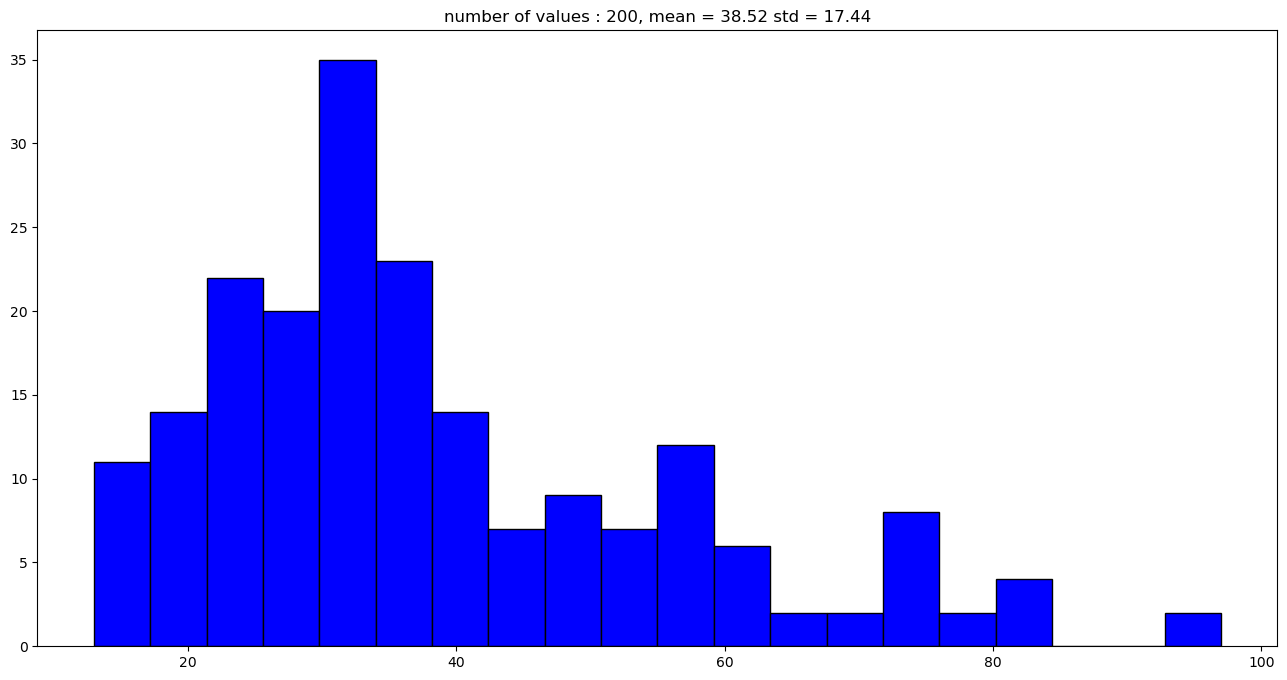

In [87]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(16,8))
plt.hist(histogram, bins=20, color="blue", linewidth=1, edgecolor="black")
plt.title(f"number of values : {len(histogram)}, mean = {round(np.mean(histogram),2)} std = {round(np.std(histogram),2)}")
plt.show()

In [88]:
nv_by_val = sorted([(v[1], v[0]) for v in name_and_val])


In [35]:
s = "framecount, name of file"

for el in nv_by_val:
    s += str(el) + "\n"

with open("list_updated.txt", "w") as f:
    f.write(s)


## Google ASL Dataset
- Parquet Format: Parquet files are a columnar storage file format. They allow for efficient data compression and encoding, which means they can store large volumes of data in a compact format while ensuring fast reads. This format is particularly beneficial for reading specific columns of data without having to load the entire dataset into memory.

- Dataset Structure: For the competition, the Parquet files contain landmark data extracted from videos with the MediaPipe holistic model. The data includes frame number, a unique row ID, landmark type (face, left hand, pose, right hand), landmark index, and normalized spatial coordinates (x, y, z).

Reformat so that it follows extract_keypoint method (pose, face, lh, rh).
Remove frames < 10, > 100.


In [21]:
#simple code to read parquet files
# Path to your Parquet file
parquet_file_path = 'asl_dataset_google/train_landmark_files/2044/3127189.parquet'

# Read the Parquet file
df = pd.read_parquet(parquet_file_path)

# Display the first few rows of the dataframe to view the landmarks
print(df.head())
#display last few rows of the dataframe of the landmarks
#print(df.tail())

   frame     row_id  type  landmark_index         x         y         z
0     21  21-face-0  face               0  0.479847  0.478954 -0.044969
1     21  21-face-1  face               1  0.469082  0.439374 -0.069958
2     21  21-face-2  face               2  0.472504  0.453134 -0.040229
3     21  21-face-3  face               3  0.458673  0.407925 -0.045351
4     21  21-face-4  face               4  0.468096  0.428457 -0.072840


In [22]:
#this code sorts out a parquet files and rearrange the order to pose,face, left-hand, right-hand
import os
import pandas as pd
import numpy as np

ids = None

order_global = {"pose" : 10000, "face" : 1000, "left_hand" : 100, "right_hand" : 10}

def process_parquet(ds):
    ret = []
    frames_unique = sorted(np.unique(ds["frame"]))
    for i,frame in enumerate(frames_unique):
        frame_ds = ds[ds['frame'] == frame]
        
        order = []
        for el in frame_ds["row_id"]:
            _frame, part, keypoint = el.split("-")
            order.append(order_global[part] - int(keypoint))

        order = np.array(order)
        frame_ds.iloc[:, 1] = order
        frame_ds = frame_ds.sort_values(by="row_id", ascending=False)
    
        vals = np.array(frame_ds[["x", "y", "z"]]).flatten()

        ret.append(vals)
    return np.array(ret)
        
#process_parquet("79631423.parquet")

In [23]:
#test whether the npy files fit the format 1629.


In [24]:
#Load parquet data into dataset_parquet for training.
from tensorflow import keras
from glob import glob
from tqdm import tqdm

#custom class to load data from Parquet files for training ML models.
class ParquetDataset(keras.utils.Sequence):
    def __init__(self, dataset_folder, csv_file : str, batch_size=32, preprocessing_func=None):
        #taking keras sequence for .fit(), .evaluate(), .predict() methods
        #load csv - it has the path to parquet file, and another to store label
        self.csv_path = csv_file
        self.root_folder = dataset_folder
        self.batch_size = batch_size
        #optional pre-processing function to the parquet files.
        self.preprocessing_func = preprocessing_func
        
        self.csv_data = pd.read_csv(self.csv_path)
        print(self.csv_data.columns)
        
        self.dataset = []
        self.not_exists = []
        
        
        for path, label in tqdm(list(zip(self.csv_data["path"], self.csv_data["sign"]))):
            prop_path = os.path.join(self.root_folder, path)
            if os.path.exists(prop_path):
                self.dataset.append((prop_path, label))
            else:
                self.not_exists.append(prop_path)
                
        
        self.dataset = np.array(self.dataset)
        self.unique_labels = np.unique(self.dataset[:, 1])
        self.label_2_id = { key : i for i, key in enumerate(self.unique_labels)}
        
        #print(self.csv_data)

    def __len__(self):
        # Assuming each Parquet file should be one batch; adjust if necessary
        return len(self.dataset)

    def __getitem__(self, idx):
        # Load one file per batch
        #take the idx value, 1st label, 
        path, label = self.dataset[idx]
        
        print(path)
        df = pd.read_parquet( path)
        
        # Apply preprocessing if specified
        if self.preprocessing_func:
            df = self.preprocessing_func(df)
        
        
        return df, self.label_2_id[label]

    def on_epoch_end(self):
        # Shuffle files for the next epoch
        np.random.shuffle(self.parquet_files)

def my_preprocessing_func(df):
    # Define your preprocessing steps here
    # Example: normalize numerical features
    return process_parquet(df)

# Usage example
parquet_folder_path = 'asl_dataset_google'
dataset_parquet = ParquetDataset(parquet_folder_path, csv_file = "asl_dataset_google/train.csv", batch_size=32, preprocessing_func=my_preprocessing_func)

Index(['path', 'participant_id', 'sequence_id', 'sign'], dtype='object')


100%|██████████████████████████████████████████████████████████████████████████| 94477/94477 [00:22<00:00, 4200.65it/s]


In [52]:
x, y = dataset_parquet[20]
print(x.shape, f"label={y}")

asl_dataset_google\train_landmark_files/26734/1002456370.parquet
(59, 1629) label=81


In [66]:
x, y = np.array(dataset_parquet)


asl_dataset_google\train_landmark_files/26734/1000035562.parquet
asl_dataset_google\train_landmark_files/16069/100015657.parquet
asl_dataset_google\train_landmark_files/25571/1000210073.parquet
asl_dataset_google\train_landmark_files/26734/1000241583.parquet
asl_dataset_google\train_landmark_files/26734/1000255522.parquet
asl_dataset_google\train_landmark_files/22343/1000638205.parquet
asl_dataset_google\train_landmark_files/26734/1000661926.parquet
asl_dataset_google\train_landmark_files/26734/1001145816.parquet
asl_dataset_google\train_landmark_files/22343/1001223069.parquet
asl_dataset_google\train_landmark_files/26734/1001284511.parquet
asl_dataset_google\train_landmark_files/18796/1001373962.parquet
asl_dataset_google\train_landmark_files/26734/1001589428.parquet
asl_dataset_google\train_landmark_files/18796/1001682966.parquet
asl_dataset_google\train_landmark_files/26734/1001931356.parquet
asl_dataset_google\train_landmark_files/2044/1001950812.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/25571/1017647108.parquet
asl_dataset_google\train_landmark_files/18796/1017765987.parquet
asl_dataset_google\train_landmark_files/18796/1017846424.parquet
asl_dataset_google\train_landmark_files/16069/1017994904.parquet
asl_dataset_google\train_landmark_files/26734/1018275085.parquet
asl_dataset_google\train_landmark_files/16069/1018622870.parquet
asl_dataset_google\train_landmark_files/16069/1019148599.parquet
asl_dataset_google\train_landmark_files/18796/1019274093.parquet
asl_dataset_google\train_landmark_files/18796/1019494452.parquet
asl_dataset_google\train_landmark_files/16069/1019501034.parquet
asl_dataset_google\train_landmark_files/26734/1019555958.parquet
asl_dataset_google\train_landmark_files/25571/1019642247.parquet
asl_dataset_google\train_landmark_files/2044/101990054.parquet
asl_dataset_google\train_landmark_files/25571/102010923.parquet
asl_dataset_google\train_landmark_files/18796/1020380433.parquet
asl_dataset_google\train_lan

asl_dataset_google\train_landmark_files/18796/1037994241.parquet
asl_dataset_google\train_landmark_files/2044/1038041627.parquet
asl_dataset_google\train_landmark_files/26734/1038270357.parquet
asl_dataset_google\train_landmark_files/2044/1038299447.parquet
asl_dataset_google\train_landmark_files/2044/1038300531.parquet
asl_dataset_google\train_landmark_files/22343/1038749660.parquet
asl_dataset_google\train_landmark_files/18796/1039289937.parquet
asl_dataset_google\train_landmark_files/2044/1039405470.parquet
asl_dataset_google\train_landmark_files/26734/1039422261.parquet
asl_dataset_google\train_landmark_files/18796/1039427744.parquet
asl_dataset_google\train_landmark_files/26734/1039813255.parquet
asl_dataset_google\train_landmark_files/18796/1040013639.parquet
asl_dataset_google\train_landmark_files/25571/1040080251.parquet
asl_dataset_google\train_landmark_files/2044/1040195717.parquet
asl_dataset_google\train_landmark_files/26734/1040227886.parquet
asl_dataset_google\train_landm

asl_dataset_google\train_landmark_files/16069/105913181.parquet
asl_dataset_google\train_landmark_files/22343/1059220152.parquet
asl_dataset_google\train_landmark_files/26734/1059356885.parquet
asl_dataset_google\train_landmark_files/2044/1059459368.parquet
asl_dataset_google\train_landmark_files/26734/1059531340.parquet
asl_dataset_google\train_landmark_files/16069/1059601636.parquet
asl_dataset_google\train_landmark_files/22343/1059757102.parquet
asl_dataset_google\train_landmark_files/25571/1059820518.parquet
asl_dataset_google\train_landmark_files/26734/1060012042.parquet
asl_dataset_google\train_landmark_files/26734/1060249469.parquet
asl_dataset_google\train_landmark_files/25571/1060260235.parquet
asl_dataset_google\train_landmark_files/2044/1060572565.parquet
asl_dataset_google\train_landmark_files/2044/1060638803.parquet
asl_dataset_google\train_landmark_files/22343/1060795224.parquet
asl_dataset_google\train_landmark_files/2044/1061007072.parquet
asl_dataset_google\train_landm

asl_dataset_google\train_landmark_files/26734/1075269220.parquet
asl_dataset_google\train_landmark_files/16069/1075418398.parquet
asl_dataset_google\train_landmark_files/2044/1075574670.parquet
asl_dataset_google\train_landmark_files/22343/1076129682.parquet
asl_dataset_google\train_landmark_files/22343/107683446.parquet
asl_dataset_google\train_landmark_files/2044/1077201783.parquet
asl_dataset_google\train_landmark_files/2044/1077225946.parquet
asl_dataset_google\train_landmark_files/25571/1077449329.parquet
asl_dataset_google\train_landmark_files/18796/1077730080.parquet
asl_dataset_google\train_landmark_files/22343/1077730934.parquet
asl_dataset_google\train_landmark_files/18796/1077905632.parquet
asl_dataset_google\train_landmark_files/16069/1077925379.parquet
asl_dataset_google\train_landmark_files/26734/1077959773.parquet
asl_dataset_google\train_landmark_files/26734/1078075343.parquet
asl_dataset_google\train_landmark_files/16069/1078150780.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/16069/1095139728.parquet
asl_dataset_google\train_landmark_files/22343/1095390941.parquet
asl_dataset_google\train_landmark_files/22343/1096089187.parquet
asl_dataset_google\train_landmark_files/16069/1096126710.parquet
asl_dataset_google\train_landmark_files/18796/1096142812.parquet
asl_dataset_google\train_landmark_files/22343/1096235365.parquet
asl_dataset_google\train_landmark_files/22343/1096256012.parquet
asl_dataset_google\train_landmark_files/22343/1096350084.parquet
asl_dataset_google\train_landmark_files/22343/1096354224.parquet
asl_dataset_google\train_landmark_files/2044/1096573145.parquet
asl_dataset_google\train_landmark_files/22343/1096613160.parquet
asl_dataset_google\train_landmark_files/16069/1096632391.parquet
asl_dataset_google\train_landmark_files/16069/109668646.parquet
asl_dataset_google\train_landmark_files/18796/1096693048.parquet
asl_dataset_google\train_landmark_files/18796/1096725717.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/18796/1112187561.parquet
asl_dataset_google\train_landmark_files/25571/1112546351.parquet
asl_dataset_google\train_landmark_files/18796/1112645409.parquet
asl_dataset_google\train_landmark_files/2044/1112950125.parquet
asl_dataset_google\train_landmark_files/18796/1113129081.parquet
asl_dataset_google\train_landmark_files/18796/1113356594.parquet
asl_dataset_google\train_landmark_files/16069/1114117525.parquet
asl_dataset_google\train_landmark_files/22343/1114181038.parquet
asl_dataset_google\train_landmark_files/26734/1114227225.parquet
asl_dataset_google\train_landmark_files/25571/1114485061.parquet
asl_dataset_google\train_landmark_files/22343/1114597649.parquet
asl_dataset_google\train_landmark_files/22343/1114628779.parquet
asl_dataset_google\train_landmark_files/26734/1114630639.parquet
asl_dataset_google\train_landmark_files/2044/1114655534.parquet
asl_dataset_google\train_landmark_files/26734/1114697371.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/25571/1130384390.parquet
asl_dataset_google\train_landmark_files/22343/1130422569.parquet
asl_dataset_google\train_landmark_files/22343/1130558308.parquet
asl_dataset_google\train_landmark_files/26734/1130595667.parquet
asl_dataset_google\train_landmark_files/2044/1130917902.parquet
asl_dataset_google\train_landmark_files/25571/1130936491.parquet
asl_dataset_google\train_landmark_files/2044/1130991358.parquet
asl_dataset_google\train_landmark_files/25571/1131047553.parquet
asl_dataset_google\train_landmark_files/26734/1131056862.parquet
asl_dataset_google\train_landmark_files/26734/113106546.parquet
asl_dataset_google\train_landmark_files/25571/1131083446.parquet
asl_dataset_google\train_landmark_files/18796/1131449629.parquet
asl_dataset_google\train_landmark_files/16069/1131694102.parquet
asl_dataset_google\train_landmark_files/25571/1131803253.parquet
asl_dataset_google\train_landmark_files/25571/1131863383.parquet
asl_dataset_google\train_lan

asl_dataset_google\train_landmark_files/22343/1150094985.parquet
asl_dataset_google\train_landmark_files/2044/1150494748.parquet
asl_dataset_google\train_landmark_files/16069/1150724980.parquet
asl_dataset_google\train_landmark_files/26734/1150809347.parquet
asl_dataset_google\train_landmark_files/26734/1150857085.parquet
asl_dataset_google\train_landmark_files/22343/1150929620.parquet
asl_dataset_google\train_landmark_files/22343/1151249432.parquet
asl_dataset_google\train_landmark_files/2044/1151409856.parquet
asl_dataset_google\train_landmark_files/22343/1151413971.parquet
asl_dataset_google\train_landmark_files/16069/1151507208.parquet
asl_dataset_google\train_landmark_files/16069/1151644454.parquet
asl_dataset_google\train_landmark_files/25571/1151735286.parquet
asl_dataset_google\train_landmark_files/16069/1151762944.parquet
asl_dataset_google\train_landmark_files/26734/1151806699.parquet
asl_dataset_google\train_landmark_files/16069/1151925788.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/26734/1168889000.parquet
asl_dataset_google\train_landmark_files/16069/1169128497.parquet
asl_dataset_google\train_landmark_files/16069/1169168362.parquet
asl_dataset_google\train_landmark_files/18796/1169464522.parquet
asl_dataset_google\train_landmark_files/18796/116973444.parquet
asl_dataset_google\train_landmark_files/18796/1169772268.parquet
asl_dataset_google\train_landmark_files/26734/1169790549.parquet
asl_dataset_google\train_landmark_files/16069/1170384158.parquet
asl_dataset_google\train_landmark_files/16069/1170394535.parquet
asl_dataset_google\train_landmark_files/22343/1170415038.parquet
asl_dataset_google\train_landmark_files/26734/1170485359.parquet
asl_dataset_google\train_landmark_files/22343/1171124703.parquet
asl_dataset_google\train_landmark_files/16069/1171310860.parquet
asl_dataset_google\train_landmark_files/18796/1171364397.parquet
asl_dataset_google\train_landmark_files/18796/1171699924.parquet
asl_dataset_google\train_l

asl_dataset_google\train_landmark_files/25571/118992711.parquet
asl_dataset_google\train_landmark_files/2044/1189999548.parquet
asl_dataset_google\train_landmark_files/25571/1190143437.parquet
asl_dataset_google\train_landmark_files/25571/1190189639.parquet
asl_dataset_google\train_landmark_files/22343/1190218701.parquet
asl_dataset_google\train_landmark_files/25571/1190282656.parquet
asl_dataset_google\train_landmark_files/26734/1190315864.parquet
asl_dataset_google\train_landmark_files/16069/1190343200.parquet
asl_dataset_google\train_landmark_files/2044/1190692576.parquet
asl_dataset_google\train_landmark_files/22343/1190801767.parquet
asl_dataset_google\train_landmark_files/16069/1190808826.parquet
asl_dataset_google\train_landmark_files/22343/1190811589.parquet
asl_dataset_google\train_landmark_files/16069/1190999164.parquet
asl_dataset_google\train_landmark_files/26734/1191152445.parquet
asl_dataset_google\train_landmark_files/16069/1191169058.parquet
asl_dataset_google\train_lan

asl_dataset_google\train_landmark_files/16069/1208262180.parquet
asl_dataset_google\train_landmark_files/25571/1208394275.parquet
asl_dataset_google\train_landmark_files/16069/1208639840.parquet
asl_dataset_google\train_landmark_files/18796/1208843253.parquet
asl_dataset_google\train_landmark_files/2044/1208853574.parquet
asl_dataset_google\train_landmark_files/2044/1208893884.parquet
asl_dataset_google\train_landmark_files/26734/1208925865.parquet
asl_dataset_google\train_landmark_files/18796/1209086606.parquet
asl_dataset_google\train_landmark_files/16069/1209501099.parquet
asl_dataset_google\train_landmark_files/2044/1209796831.parquet
asl_dataset_google\train_landmark_files/26734/1210059841.parquet
asl_dataset_google\train_landmark_files/16069/1210252943.parquet
asl_dataset_google\train_landmark_files/16069/1210275152.parquet
asl_dataset_google\train_landmark_files/22343/1210283400.parquet
asl_dataset_google\train_landmark_files/26734/1210730463.parquet
asl_dataset_google\train_lan

asl_dataset_google\train_landmark_files/25571/122859033.parquet
asl_dataset_google\train_landmark_files/2044/1228884523.parquet
asl_dataset_google\train_landmark_files/2044/1229292236.parquet
asl_dataset_google\train_landmark_files/18796/1229342676.parquet
asl_dataset_google\train_landmark_files/26734/1229559635.parquet
asl_dataset_google\train_landmark_files/18796/1229603579.parquet
asl_dataset_google\train_landmark_files/25571/1229609805.parquet
asl_dataset_google\train_landmark_files/25571/1229662169.parquet
asl_dataset_google\train_landmark_files/2044/1229905287.parquet
asl_dataset_google\train_landmark_files/22343/1229908668.parquet
asl_dataset_google\train_landmark_files/22343/122996777.parquet
asl_dataset_google\train_landmark_files/26734/1230223859.parquet
asl_dataset_google\train_landmark_files/26734/1230225865.parquet
asl_dataset_google\train_landmark_files/16069/1230387310.parquet
asl_dataset_google\train_landmark_files/25571/1230600667.parquet
asl_dataset_google\train_landm

asl_dataset_google\train_landmark_files/16069/1245772134.parquet
asl_dataset_google\train_landmark_files/18796/1245787914.parquet
asl_dataset_google\train_landmark_files/25571/1245878179.parquet
asl_dataset_google\train_landmark_files/22343/1246047068.parquet
asl_dataset_google\train_landmark_files/2044/1246204623.parquet
asl_dataset_google\train_landmark_files/2044/1246286602.parquet
asl_dataset_google\train_landmark_files/16069/1247133785.parquet
asl_dataset_google\train_landmark_files/25571/1247161136.parquet
asl_dataset_google\train_landmark_files/18796/1247244027.parquet
asl_dataset_google\train_landmark_files/2044/1247360956.parquet
asl_dataset_google\train_landmark_files/26734/1247498799.parquet
asl_dataset_google\train_landmark_files/26734/1247514751.parquet
asl_dataset_google\train_landmark_files/18796/1247577681.parquet
asl_dataset_google\train_landmark_files/2044/1247630753.parquet
asl_dataset_google\train_landmark_files/26734/1247837926.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/16069/1263650471.parquet
asl_dataset_google\train_landmark_files/26734/1263684477.parquet
asl_dataset_google\train_landmark_files/16069/1263972754.parquet
asl_dataset_google\train_landmark_files/26734/1264081756.parquet
asl_dataset_google\train_landmark_files/22343/1264252387.parquet
asl_dataset_google\train_landmark_files/2044/1264365898.parquet
asl_dataset_google\train_landmark_files/16069/1264441634.parquet
asl_dataset_google\train_landmark_files/25571/1264665727.parquet
asl_dataset_google\train_landmark_files/2044/1264693589.parquet
asl_dataset_google\train_landmark_files/22343/1264840299.parquet
asl_dataset_google\train_landmark_files/2044/1264947721.parquet
asl_dataset_google\train_landmark_files/25571/1265594576.parquet
asl_dataset_google\train_landmark_files/16069/1265600035.parquet
asl_dataset_google\train_landmark_files/26734/1265641176.parquet
asl_dataset_google\train_landmark_files/22343/1266022180.parquet
asl_dataset_google\train_lan

asl_dataset_google\train_landmark_files/16069/1281972067.parquet
asl_dataset_google\train_landmark_files/22343/1282104200.parquet
asl_dataset_google\train_landmark_files/22343/1282143323.parquet
asl_dataset_google\train_landmark_files/2044/1282295278.parquet
asl_dataset_google\train_landmark_files/18796/128230521.parquet
asl_dataset_google\train_landmark_files/16069/1282385831.parquet
asl_dataset_google\train_landmark_files/2044/1282601035.parquet
asl_dataset_google\train_landmark_files/22343/1282646099.parquet
asl_dataset_google\train_landmark_files/22343/1282703016.parquet
asl_dataset_google\train_landmark_files/2044/128272602.parquet
asl_dataset_google\train_landmark_files/26734/1282776808.parquet
asl_dataset_google\train_landmark_files/22343/1283210040.parquet
asl_dataset_google\train_landmark_files/18796/1283377086.parquet
asl_dataset_google\train_landmark_files/2044/1283560418.parquet
asl_dataset_google\train_landmark_files/16069/1283841945.parquet
asl_dataset_google\train_landma

asl_dataset_google\train_landmark_files/16069/1304022887.parquet
asl_dataset_google\train_landmark_files/25571/130407565.parquet
asl_dataset_google\train_landmark_files/2044/1304163042.parquet
asl_dataset_google\train_landmark_files/16069/1304292343.parquet
asl_dataset_google\train_landmark_files/16069/1304416528.parquet
asl_dataset_google\train_landmark_files/2044/1304554842.parquet
asl_dataset_google\train_landmark_files/26734/1304662506.parquet
asl_dataset_google\train_landmark_files/16069/1304664552.parquet
asl_dataset_google\train_landmark_files/16069/1304734354.parquet
asl_dataset_google\train_landmark_files/22343/1304916398.parquet
asl_dataset_google\train_landmark_files/26734/1304922790.parquet
asl_dataset_google\train_landmark_files/25571/1305057866.parquet
asl_dataset_google\train_landmark_files/26734/1305154563.parquet
asl_dataset_google\train_landmark_files/2044/1305533020.parquet
asl_dataset_google\train_landmark_files/26734/1306181785.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/2044/1324072360.parquet
asl_dataset_google\train_landmark_files/2044/1324153294.parquet
asl_dataset_google\train_landmark_files/26734/1324440211.parquet
asl_dataset_google\train_landmark_files/26734/1324456882.parquet
asl_dataset_google\train_landmark_files/18796/132474999.parquet
asl_dataset_google\train_landmark_files/2044/1324819947.parquet
asl_dataset_google\train_landmark_files/25571/1324832589.parquet
asl_dataset_google\train_landmark_files/18796/1324886365.parquet
asl_dataset_google\train_landmark_files/18796/1324982801.parquet
asl_dataset_google\train_landmark_files/22343/132526412.parquet
asl_dataset_google\train_landmark_files/26734/132537719.parquet
asl_dataset_google\train_landmark_files/2044/1325607473.parquet
asl_dataset_google\train_landmark_files/18796/1326265234.parquet
asl_dataset_google\train_landmark_files/26734/1326296985.parquet
asl_dataset_google\train_landmark_files/2044/1326349504.parquet
asl_dataset_google\train_landmark

asl_dataset_google\train_landmark_files/16069/1342125944.parquet
asl_dataset_google\train_landmark_files/26734/1342174844.parquet
asl_dataset_google\train_landmark_files/16069/1342261062.parquet
asl_dataset_google\train_landmark_files/25571/1342264878.parquet
asl_dataset_google\train_landmark_files/16069/134227042.parquet
asl_dataset_google\train_landmark_files/2044/1342281740.parquet
asl_dataset_google\train_landmark_files/22343/1342468420.parquet
asl_dataset_google\train_landmark_files/18796/1342657315.parquet
asl_dataset_google\train_landmark_files/16069/1342759061.parquet
asl_dataset_google\train_landmark_files/25571/1342777524.parquet
asl_dataset_google\train_landmark_files/25571/1342971591.parquet
asl_dataset_google\train_landmark_files/25571/1342980960.parquet
asl_dataset_google\train_landmark_files/16069/1343022792.parquet
asl_dataset_google\train_landmark_files/25571/1343046754.parquet
asl_dataset_google\train_landmark_files/16069/1343064630.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/2044/1359875445.parquet
asl_dataset_google\train_landmark_files/2044/1360046839.parquet
asl_dataset_google\train_landmark_files/25571/1360061041.parquet
asl_dataset_google\train_landmark_files/26734/1360114605.parquet
asl_dataset_google\train_landmark_files/16069/1360227809.parquet
asl_dataset_google\train_landmark_files/18796/1360246153.parquet
asl_dataset_google\train_landmark_files/22343/1360599959.parquet
asl_dataset_google\train_landmark_files/16069/1360607864.parquet
asl_dataset_google\train_landmark_files/26734/1360794583.parquet
asl_dataset_google\train_landmark_files/25571/1360891083.parquet
asl_dataset_google\train_landmark_files/25571/1361029629.parquet
asl_dataset_google\train_landmark_files/16069/1361302819.parquet
asl_dataset_google\train_landmark_files/18796/136149500.parquet
asl_dataset_google\train_landmark_files/25571/1361512207.parquet
asl_dataset_google\train_landmark_files/26734/136151787.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/25571/1379444962.parquet
asl_dataset_google\train_landmark_files/16069/1379881543.parquet
asl_dataset_google\train_landmark_files/2044/1379908190.parquet
asl_dataset_google\train_landmark_files/18796/1380221259.parquet
asl_dataset_google\train_landmark_files/22343/1380603188.parquet
asl_dataset_google\train_landmark_files/22343/1380709787.parquet
asl_dataset_google\train_landmark_files/2044/1380782541.parquet
asl_dataset_google\train_landmark_files/26734/1380935957.parquet
asl_dataset_google\train_landmark_files/16069/138110163.parquet
asl_dataset_google\train_landmark_files/2044/1381150449.parquet
asl_dataset_google\train_landmark_files/25571/1381237013.parquet
asl_dataset_google\train_landmark_files/22343/1381286033.parquet
asl_dataset_google\train_landmark_files/25571/1381353977.parquet
asl_dataset_google\train_landmark_files/26734/1381421928.parquet
asl_dataset_google\train_landmark_files/2044/138147276.parquet
asl_dataset_google\train_landma

asl_dataset_google\train_landmark_files/18796/1399623856.parquet
asl_dataset_google\train_landmark_files/26734/1399669538.parquet
asl_dataset_google\train_landmark_files/22343/1399671602.parquet
asl_dataset_google\train_landmark_files/2044/1400076955.parquet
asl_dataset_google\train_landmark_files/22343/1400571938.parquet
asl_dataset_google\train_landmark_files/2044/1400667461.parquet
asl_dataset_google\train_landmark_files/22343/1400779759.parquet
asl_dataset_google\train_landmark_files/16069/1400905315.parquet
asl_dataset_google\train_landmark_files/25571/1401261844.parquet
asl_dataset_google\train_landmark_files/16069/1401286339.parquet
asl_dataset_google\train_landmark_files/26734/1401342284.parquet
asl_dataset_google\train_landmark_files/22343/1401432808.parquet
asl_dataset_google\train_landmark_files/25571/1401446798.parquet
asl_dataset_google\train_landmark_files/16069/1401598525.parquet
asl_dataset_google\train_landmark_files/18796/140192897.parquet
asl_dataset_google\train_lan

asl_dataset_google\train_landmark_files/26734/1417444752.parquet
asl_dataset_google\train_landmark_files/18796/1417666246.parquet
asl_dataset_google\train_landmark_files/26734/14180831.parquet
asl_dataset_google\train_landmark_files/18796/1418219885.parquet
asl_dataset_google\train_landmark_files/16069/1418304029.parquet
asl_dataset_google\train_landmark_files/26734/1418376443.parquet
asl_dataset_google\train_landmark_files/25571/1418386201.parquet
asl_dataset_google\train_landmark_files/18796/1418468276.parquet
asl_dataset_google\train_landmark_files/16069/1418615428.parquet
asl_dataset_google\train_landmark_files/26734/1418650900.parquet
asl_dataset_google\train_landmark_files/26734/1418747932.parquet
asl_dataset_google\train_landmark_files/22343/1418791381.parquet
asl_dataset_google\train_landmark_files/22343/1419002339.parquet
asl_dataset_google\train_landmark_files/25571/1419016710.parquet
asl_dataset_google\train_landmark_files/26734/1419151990.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/26734/1433558847.parquet
asl_dataset_google\train_landmark_files/18796/1433614136.parquet
asl_dataset_google\train_landmark_files/16069/1433758883.parquet
asl_dataset_google\train_landmark_files/2044/1433919177.parquet
asl_dataset_google\train_landmark_files/26734/1434089946.parquet
asl_dataset_google\train_landmark_files/2044/1434244603.parquet
asl_dataset_google\train_landmark_files/16069/1434412241.parquet
asl_dataset_google\train_landmark_files/22343/1434622001.parquet
asl_dataset_google\train_landmark_files/22343/1434623078.parquet
asl_dataset_google\train_landmark_files/22343/1434713269.parquet
asl_dataset_google\train_landmark_files/22343/14348410.parquet
asl_dataset_google\train_landmark_files/16069/1434935574.parquet
asl_dataset_google\train_landmark_files/2044/1435001565.parquet
asl_dataset_google\train_landmark_files/22343/1435039121.parquet
asl_dataset_google\train_landmark_files/2044/1435150351.parquet
asl_dataset_google\train_landma

asl_dataset_google\train_landmark_files/18796/1452215883.parquet
asl_dataset_google\train_landmark_files/26734/1452250064.parquet
asl_dataset_google\train_landmark_files/22343/1452395695.parquet
asl_dataset_google\train_landmark_files/22343/1452767299.parquet
asl_dataset_google\train_landmark_files/22343/1452905857.parquet
asl_dataset_google\train_landmark_files/2044/1453048291.parquet
asl_dataset_google\train_landmark_files/16069/1453052000.parquet
asl_dataset_google\train_landmark_files/26734/1453115472.parquet
asl_dataset_google\train_landmark_files/25571/1453161800.parquet
asl_dataset_google\train_landmark_files/2044/1453797984.parquet
asl_dataset_google\train_landmark_files/26734/1454023124.parquet
asl_dataset_google\train_landmark_files/18796/1454162968.parquet
asl_dataset_google\train_landmark_files/26734/1454183850.parquet
asl_dataset_google\train_landmark_files/18796/1454191762.parquet
asl_dataset_google\train_landmark_files/18796/1454367652.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/2044/146985606.parquet
asl_dataset_google\train_landmark_files/18796/1469864504.parquet
asl_dataset_google\train_landmark_files/16069/1469867050.parquet
asl_dataset_google\train_landmark_files/26734/1469906998.parquet
asl_dataset_google\train_landmark_files/2044/1469932191.parquet
asl_dataset_google\train_landmark_files/26734/1470303248.parquet
asl_dataset_google\train_landmark_files/26734/147034617.parquet
asl_dataset_google\train_landmark_files/22343/1470421966.parquet
asl_dataset_google\train_landmark_files/25571/1470512210.parquet
asl_dataset_google\train_landmark_files/2044/147056707.parquet
asl_dataset_google\train_landmark_files/22343/1470604037.parquet
asl_dataset_google\train_landmark_files/22343/1470723642.parquet
asl_dataset_google\train_landmark_files/25571/1470837980.parquet
asl_dataset_google\train_landmark_files/22343/1470950776.parquet
asl_dataset_google\train_landmark_files/18796/1470997982.parquet
asl_dataset_google\train_landma

asl_dataset_google\train_landmark_files/16069/1488597243.parquet
asl_dataset_google\train_landmark_files/26734/1489171199.parquet
asl_dataset_google\train_landmark_files/2044/1489333318.parquet
asl_dataset_google\train_landmark_files/22343/1489343945.parquet
asl_dataset_google\train_landmark_files/18796/1489566787.parquet
asl_dataset_google\train_landmark_files/22343/1489731921.parquet
asl_dataset_google\train_landmark_files/22343/1489804210.parquet
asl_dataset_google\train_landmark_files/2044/1489860452.parquet
asl_dataset_google\train_landmark_files/16069/1489927904.parquet
asl_dataset_google\train_landmark_files/2044/1490120137.parquet
asl_dataset_google\train_landmark_files/22343/1490291381.parquet
asl_dataset_google\train_landmark_files/22343/1490377139.parquet
asl_dataset_google\train_landmark_files/2044/1490402032.parquet
asl_dataset_google\train_landmark_files/2044/1490720380.parquet
asl_dataset_google\train_landmark_files/22343/1490924902.parquet
asl_dataset_google\train_landm

asl_dataset_google\train_landmark_files/16069/150367050.parquet
asl_dataset_google\train_landmark_files/26734/1503951349.parquet
asl_dataset_google\train_landmark_files/2044/1504051897.parquet
asl_dataset_google\train_landmark_files/22343/1504251052.parquet
asl_dataset_google\train_landmark_files/25571/1504251747.parquet
asl_dataset_google\train_landmark_files/22343/1504334638.parquet
asl_dataset_google\train_landmark_files/22343/1504735391.parquet
asl_dataset_google\train_landmark_files/26734/1504864892.parquet
asl_dataset_google\train_landmark_files/25571/1505089291.parquet
asl_dataset_google\train_landmark_files/2044/1505145844.parquet
asl_dataset_google\train_landmark_files/22343/1505408557.parquet
asl_dataset_google\train_landmark_files/2044/1505563576.parquet
asl_dataset_google\train_landmark_files/18796/1505706906.parquet
asl_dataset_google\train_landmark_files/26734/1505989137.parquet
asl_dataset_google\train_landmark_files/16069/150612601.parquet
asl_dataset_google\train_landm

asl_dataset_google\train_landmark_files/16069/1522847745.parquet
asl_dataset_google\train_landmark_files/18796/1523091039.parquet
asl_dataset_google\train_landmark_files/22343/1523578235.parquet
asl_dataset_google\train_landmark_files/25571/1523636360.parquet
asl_dataset_google\train_landmark_files/26734/1523641361.parquet
asl_dataset_google\train_landmark_files/25571/1523734264.parquet
asl_dataset_google\train_landmark_files/22343/1523758461.parquet
asl_dataset_google\train_landmark_files/18796/1523831106.parquet
asl_dataset_google\train_landmark_files/22343/1524181409.parquet
asl_dataset_google\train_landmark_files/2044/1524207777.parquet
asl_dataset_google\train_landmark_files/16069/1524251190.parquet
asl_dataset_google\train_landmark_files/16069/1524297234.parquet
asl_dataset_google\train_landmark_files/18796/1524304519.parquet
asl_dataset_google\train_landmark_files/26734/1524407658.parquet
asl_dataset_google\train_landmark_files/2044/1524545169.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/2044/1543352282.parquet
asl_dataset_google\train_landmark_files/16069/1543358027.parquet
asl_dataset_google\train_landmark_files/22343/1543368770.parquet
asl_dataset_google\train_landmark_files/22343/1543470493.parquet
asl_dataset_google\train_landmark_files/25571/1543518581.parquet
asl_dataset_google\train_landmark_files/26734/1543664286.parquet
asl_dataset_google\train_landmark_files/25571/1543689562.parquet
asl_dataset_google\train_landmark_files/16069/1543834650.parquet
asl_dataset_google\train_landmark_files/18796/1543913382.parquet
asl_dataset_google\train_landmark_files/2044/1543957888.parquet
asl_dataset_google\train_landmark_files/25571/1544256292.parquet
asl_dataset_google\train_landmark_files/2044/1544283060.parquet
asl_dataset_google\train_landmark_files/25571/1544315455.parquet
asl_dataset_google\train_landmark_files/2044/1544485225.parquet
asl_dataset_google\train_landmark_files/26734/1544805002.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/2044/1561505339.parquet
asl_dataset_google\train_landmark_files/22343/1561663371.parquet
asl_dataset_google\train_landmark_files/2044/1561849333.parquet
asl_dataset_google\train_landmark_files/2044/1561967712.parquet
asl_dataset_google\train_landmark_files/25571/1562038838.parquet
asl_dataset_google\train_landmark_files/25571/1562409144.parquet
asl_dataset_google\train_landmark_files/25571/1562506011.parquet
asl_dataset_google\train_landmark_files/16069/1562570709.parquet
asl_dataset_google\train_landmark_files/16069/1562624779.parquet
asl_dataset_google\train_landmark_files/26734/1562826310.parquet
asl_dataset_google\train_landmark_files/18796/1562851835.parquet
asl_dataset_google\train_landmark_files/18796/1562883073.parquet
asl_dataset_google\train_landmark_files/26734/1563287849.parquet
asl_dataset_google\train_landmark_files/18796/156352553.parquet
asl_dataset_google\train_landmark_files/25571/1563827565.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/16069/1580795249.parquet
asl_dataset_google\train_landmark_files/26734/1580806388.parquet
asl_dataset_google\train_landmark_files/18796/158101356.parquet
asl_dataset_google\train_landmark_files/16069/15811787.parquet
asl_dataset_google\train_landmark_files/25571/1581203434.parquet
asl_dataset_google\train_landmark_files/26734/1581450459.parquet
asl_dataset_google\train_landmark_files/16069/158148182.parquet
asl_dataset_google\train_landmark_files/22343/1581592664.parquet
asl_dataset_google\train_landmark_files/16069/1582009250.parquet
asl_dataset_google\train_landmark_files/18796/1582214998.parquet
asl_dataset_google\train_landmark_files/16069/158232956.parquet
asl_dataset_google\train_landmark_files/25571/1582444632.parquet
asl_dataset_google\train_landmark_files/25571/1582444821.parquet
asl_dataset_google\train_landmark_files/2044/1582640921.parquet
asl_dataset_google\train_landmark_files/2044/1582780923.parquet
asl_dataset_google\train_landmar

asl_dataset_google\train_landmark_files/22343/1599830541.parquet
asl_dataset_google\train_landmark_files/22343/159994266.parquet
asl_dataset_google\train_landmark_files/18796/1600329608.parquet
asl_dataset_google\train_landmark_files/2044/1600466943.parquet
asl_dataset_google\train_landmark_files/2044/1600916429.parquet
asl_dataset_google\train_landmark_files/22343/1601471515.parquet
asl_dataset_google\train_landmark_files/22343/1601485083.parquet
asl_dataset_google\train_landmark_files/2044/1601546828.parquet
asl_dataset_google\train_landmark_files/22343/1601610040.parquet
asl_dataset_google\train_landmark_files/2044/1601677669.parquet
asl_dataset_google\train_landmark_files/26734/1601834904.parquet
asl_dataset_google\train_landmark_files/16069/1602070677.parquet
asl_dataset_google\train_landmark_files/2044/1602233247.parquet
asl_dataset_google\train_landmark_files/25571/1602618087.parquet
asl_dataset_google\train_landmark_files/16069/1602693468.parquet
asl_dataset_google\train_landma

asl_dataset_google\train_landmark_files/25571/162363692.parquet
asl_dataset_google\train_landmark_files/25571/1624017312.parquet
asl_dataset_google\train_landmark_files/16069/1624086834.parquet
asl_dataset_google\train_landmark_files/22343/1624178798.parquet
asl_dataset_google\train_landmark_files/22343/1624236148.parquet
asl_dataset_google\train_landmark_files/16069/1624492078.parquet
asl_dataset_google\train_landmark_files/18796/1624658177.parquet
asl_dataset_google\train_landmark_files/16069/1624713580.parquet
asl_dataset_google\train_landmark_files/16069/1624852382.parquet
asl_dataset_google\train_landmark_files/16069/1624945424.parquet
asl_dataset_google\train_landmark_files/26734/1625076696.parquet
asl_dataset_google\train_landmark_files/16069/1625249575.parquet
asl_dataset_google\train_landmark_files/2044/1625282572.parquet
asl_dataset_google\train_landmark_files/25571/1625499292.parquet
asl_dataset_google\train_landmark_files/2044/1626109546.parquet
asl_dataset_google\train_lan

asl_dataset_google\train_landmark_files/22343/1639061644.parquet
asl_dataset_google\train_landmark_files/18796/1639323266.parquet
asl_dataset_google\train_landmark_files/22343/1639668010.parquet
asl_dataset_google\train_landmark_files/18796/1639694384.parquet
asl_dataset_google\train_landmark_files/16069/1639758743.parquet
asl_dataset_google\train_landmark_files/26734/1640065357.parquet
asl_dataset_google\train_landmark_files/22343/1640075744.parquet
asl_dataset_google\train_landmark_files/18796/1640075977.parquet
asl_dataset_google\train_landmark_files/26734/1640194167.parquet
asl_dataset_google\train_landmark_files/16069/1640202440.parquet
asl_dataset_google\train_landmark_files/25571/1640223332.parquet
asl_dataset_google\train_landmark_files/2044/1640326256.parquet
asl_dataset_google\train_landmark_files/22343/1640508396.parquet
asl_dataset_google\train_landmark_files/16069/1640890195.parquet
asl_dataset_google\train_landmark_files/22343/1641115090.parquet
asl_dataset_google\train_l

asl_dataset_google\train_landmark_files/18796/1656308995.parquet
asl_dataset_google\train_landmark_files/25571/1656473847.parquet
asl_dataset_google\train_landmark_files/2044/1656514423.parquet
asl_dataset_google\train_landmark_files/2044/165663472.parquet
asl_dataset_google\train_landmark_files/16069/165665647.parquet
asl_dataset_google\train_landmark_files/18796/1656907620.parquet
asl_dataset_google\train_landmark_files/16069/1656958959.parquet
asl_dataset_google\train_landmark_files/16069/165710420.parquet
asl_dataset_google\train_landmark_files/25571/1657297992.parquet
asl_dataset_google\train_landmark_files/2044/1657372464.parquet
asl_dataset_google\train_landmark_files/25571/1657606377.parquet
asl_dataset_google\train_landmark_files/26734/1657742160.parquet
asl_dataset_google\train_landmark_files/25571/1658495912.parquet
asl_dataset_google\train_landmark_files/2044/1658591246.parquet
asl_dataset_google\train_landmark_files/16069/1658617883.parquet
asl_dataset_google\train_landmar

asl_dataset_google\train_landmark_files/18796/1677502864.parquet
asl_dataset_google\train_landmark_files/18796/1677520697.parquet
asl_dataset_google\train_landmark_files/25571/1677741065.parquet
asl_dataset_google\train_landmark_files/2044/167792347.parquet
asl_dataset_google\train_landmark_files/18796/1677935245.parquet
asl_dataset_google\train_landmark_files/16069/1677970592.parquet
asl_dataset_google\train_landmark_files/25571/1678016610.parquet
asl_dataset_google\train_landmark_files/26734/1678052378.parquet
asl_dataset_google\train_landmark_files/26734/1678713370.parquet
asl_dataset_google\train_landmark_files/22343/1678861772.parquet
asl_dataset_google\train_landmark_files/22343/1679005108.parquet
asl_dataset_google\train_landmark_files/16069/1679495134.parquet
asl_dataset_google\train_landmark_files/22343/1679817471.parquet
asl_dataset_google\train_landmark_files/26734/167992097.parquet
asl_dataset_google\train_landmark_files/25571/167999084.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/26734/1697989237.parquet
asl_dataset_google\train_landmark_files/26734/169811692.parquet
asl_dataset_google\train_landmark_files/26734/1698214284.parquet
asl_dataset_google\train_landmark_files/18796/1698215242.parquet
asl_dataset_google\train_landmark_files/18796/1698217203.parquet
asl_dataset_google\train_landmark_files/25571/1698422580.parquet
asl_dataset_google\train_landmark_files/25571/169853566.parquet
asl_dataset_google\train_landmark_files/22343/1698679503.parquet
asl_dataset_google\train_landmark_files/26734/1698687889.parquet
asl_dataset_google\train_landmark_files/2044/1698761004.parquet
asl_dataset_google\train_landmark_files/18796/1698804500.parquet
asl_dataset_google\train_landmark_files/22343/1698867630.parquet
asl_dataset_google\train_landmark_files/18796/1698902864.parquet
asl_dataset_google\train_landmark_files/2044/1699029031.parquet
asl_dataset_google\train_landmark_files/22343/1699205088.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/26734/1715410293.parquet
asl_dataset_google\train_landmark_files/26734/1715609873.parquet
asl_dataset_google\train_landmark_files/2044/1715808445.parquet
asl_dataset_google\train_landmark_files/18796/1716066400.parquet
asl_dataset_google\train_landmark_files/2044/1716073856.parquet
asl_dataset_google\train_landmark_files/22343/1716199919.parquet
asl_dataset_google\train_landmark_files/16069/1716273074.parquet
asl_dataset_google\train_landmark_files/22343/1716844710.parquet
asl_dataset_google\train_landmark_files/18796/1717091591.parquet
asl_dataset_google\train_landmark_files/2044/1717184281.parquet
asl_dataset_google\train_landmark_files/22343/1717217086.parquet
asl_dataset_google\train_landmark_files/25571/1717399191.parquet
asl_dataset_google\train_landmark_files/25571/1717403356.parquet
asl_dataset_google\train_landmark_files/16069/1717506132.parquet
asl_dataset_google\train_landmark_files/2044/1717977766.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/25571/17344740.parquet
asl_dataset_google\train_landmark_files/26734/173453765.parquet
asl_dataset_google\train_landmark_files/2044/1734642026.parquet
asl_dataset_google\train_landmark_files/26734/1735199038.parquet
asl_dataset_google\train_landmark_files/18796/1735558066.parquet
asl_dataset_google\train_landmark_files/2044/1735598296.parquet
asl_dataset_google\train_landmark_files/25571/1735773014.parquet
asl_dataset_google\train_landmark_files/22343/1735859703.parquet
asl_dataset_google\train_landmark_files/25571/1735901398.parquet
asl_dataset_google\train_landmark_files/26734/1735902243.parquet
asl_dataset_google\train_landmark_files/18796/1735986691.parquet
asl_dataset_google\train_landmark_files/16069/1736158802.parquet
asl_dataset_google\train_landmark_files/26734/1736347789.parquet
asl_dataset_google\train_landmark_files/18796/1736400847.parquet
asl_dataset_google\train_landmark_files/25571/1736432446.parquet
asl_dataset_google\train_landm

asl_dataset_google\train_landmark_files/16069/1754484251.parquet
asl_dataset_google\train_landmark_files/22343/1754802566.parquet
asl_dataset_google\train_landmark_files/25571/1755049608.parquet
asl_dataset_google\train_landmark_files/2044/1755146805.parquet
asl_dataset_google\train_landmark_files/16069/1755415860.parquet
asl_dataset_google\train_landmark_files/22343/1755468476.parquet
asl_dataset_google\train_landmark_files/26734/175547429.parquet
asl_dataset_google\train_landmark_files/26734/1755607339.parquet
asl_dataset_google\train_landmark_files/16069/1755624897.parquet
asl_dataset_google\train_landmark_files/26734/1755769896.parquet
asl_dataset_google\train_landmark_files/25571/1755900560.parquet
asl_dataset_google\train_landmark_files/26734/1755997765.parquet
asl_dataset_google\train_landmark_files/26734/1756339149.parquet
asl_dataset_google\train_landmark_files/18796/1756497341.parquet
asl_dataset_google\train_landmark_files/26734/175697813.parquet
asl_dataset_google\train_lan

asl_dataset_google\train_landmark_files/26734/1773113874.parquet
asl_dataset_google\train_landmark_files/2044/1773353839.parquet
asl_dataset_google\train_landmark_files/16069/1773413240.parquet
asl_dataset_google\train_landmark_files/25571/1773438976.parquet
asl_dataset_google\train_landmark_files/26734/1773498237.parquet
asl_dataset_google\train_landmark_files/26734/1773557276.parquet
asl_dataset_google\train_landmark_files/22343/1773587263.parquet
asl_dataset_google\train_landmark_files/18796/1773717928.parquet
asl_dataset_google\train_landmark_files/16069/1773787626.parquet
asl_dataset_google\train_landmark_files/18796/177395583.parquet
asl_dataset_google\train_landmark_files/16069/177408363.parquet
asl_dataset_google\train_landmark_files/16069/1774113716.parquet
asl_dataset_google\train_landmark_files/25571/1774450064.parquet
asl_dataset_google\train_landmark_files/16069/1774460506.parquet
asl_dataset_google\train_landmark_files/25571/177451591.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/26734/1791419264.parquet
asl_dataset_google\train_landmark_files/25571/1791467676.parquet
asl_dataset_google\train_landmark_files/16069/1791684792.parquet
asl_dataset_google\train_landmark_files/26734/1791864776.parquet
asl_dataset_google\train_landmark_files/26734/1791959325.parquet
asl_dataset_google\train_landmark_files/26734/179210272.parquet
asl_dataset_google\train_landmark_files/26734/1792121709.parquet
asl_dataset_google\train_landmark_files/22343/1792191359.parquet
asl_dataset_google\train_landmark_files/26734/1792286130.parquet
asl_dataset_google\train_landmark_files/26734/1792344730.parquet
asl_dataset_google\train_landmark_files/25571/1792508757.parquet
asl_dataset_google\train_landmark_files/22343/1792523551.parquet
asl_dataset_google\train_landmark_files/2044/1792925999.parquet
asl_dataset_google\train_landmark_files/26734/1792955291.parquet
asl_dataset_google\train_landmark_files/25571/1793173471.parquet
asl_dataset_google\train_la

asl_dataset_google\train_landmark_files/22343/1809694528.parquet
asl_dataset_google\train_landmark_files/26734/1809726698.parquet
asl_dataset_google\train_landmark_files/18796/1809840373.parquet
asl_dataset_google\train_landmark_files/18796/1809858038.parquet
asl_dataset_google\train_landmark_files/22343/1810072118.parquet
asl_dataset_google\train_landmark_files/26734/1810079443.parquet
asl_dataset_google\train_landmark_files/2044/1810330490.parquet
asl_dataset_google\train_landmark_files/2044/1810455882.parquet
asl_dataset_google\train_landmark_files/18796/181048619.parquet
asl_dataset_google\train_landmark_files/2044/1810805116.parquet
asl_dataset_google\train_landmark_files/18796/1811018482.parquet
asl_dataset_google\train_landmark_files/2044/1811234881.parquet
asl_dataset_google\train_landmark_files/22343/1811299577.parquet
asl_dataset_google\train_landmark_files/26734/1811603217.parquet
asl_dataset_google\train_landmark_files/2044/1811759380.parquet
asl_dataset_google\train_landma

asl_dataset_google\train_landmark_files/22343/1831098351.parquet
asl_dataset_google\train_landmark_files/16069/1831167282.parquet
asl_dataset_google\train_landmark_files/26734/1831243165.parquet
asl_dataset_google\train_landmark_files/2044/1831602606.parquet
asl_dataset_google\train_landmark_files/16069/1831773546.parquet
asl_dataset_google\train_landmark_files/16069/1831811309.parquet
asl_dataset_google\train_landmark_files/26734/1831943009.parquet
asl_dataset_google\train_landmark_files/2044/1832158718.parquet
asl_dataset_google\train_landmark_files/26734/1832432929.parquet
asl_dataset_google\train_landmark_files/26734/1832490052.parquet
asl_dataset_google\train_landmark_files/22343/183263581.parquet
asl_dataset_google\train_landmark_files/16069/1832683364.parquet
asl_dataset_google\train_landmark_files/18796/1833038478.parquet
asl_dataset_google\train_landmark_files/25571/183330329.parquet
asl_dataset_google\train_landmark_files/16069/1833355583.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/26734/1848801622.parquet
asl_dataset_google\train_landmark_files/18796/1849112620.parquet
asl_dataset_google\train_landmark_files/16069/1849352888.parquet
asl_dataset_google\train_landmark_files/26734/1849388461.parquet
asl_dataset_google\train_landmark_files/22343/1849406713.parquet
asl_dataset_google\train_landmark_files/25571/1849579049.parquet
asl_dataset_google\train_landmark_files/26734/1849594843.parquet
asl_dataset_google\train_landmark_files/26734/184961213.parquet
asl_dataset_google\train_landmark_files/16069/1850056514.parquet
asl_dataset_google\train_landmark_files/26734/1850162574.parquet
asl_dataset_google\train_landmark_files/26734/1850291303.parquet
asl_dataset_google\train_landmark_files/22343/1850812816.parquet
asl_dataset_google\train_landmark_files/26734/1850866190.parquet
asl_dataset_google\train_landmark_files/22343/1850970460.parquet
asl_dataset_google\train_landmark_files/22343/1851096415.parquet
asl_dataset_google\train_l

asl_dataset_google\train_landmark_files/26734/1868735223.parquet
asl_dataset_google\train_landmark_files/26734/1868861195.parquet
asl_dataset_google\train_landmark_files/18796/1868867390.parquet
asl_dataset_google\train_landmark_files/26734/1869169414.parquet
asl_dataset_google\train_landmark_files/2044/186947348.parquet
asl_dataset_google\train_landmark_files/26734/1869596689.parquet
asl_dataset_google\train_landmark_files/22343/1869617161.parquet
asl_dataset_google\train_landmark_files/25571/1869843339.parquet
asl_dataset_google\train_landmark_files/2044/1870091560.parquet
asl_dataset_google\train_landmark_files/18796/1870122347.parquet
asl_dataset_google\train_landmark_files/25571/1870182453.parquet
asl_dataset_google\train_landmark_files/2044/1870260165.parquet
asl_dataset_google\train_landmark_files/25571/1870343553.parquet
asl_dataset_google\train_landmark_files/18796/1870396912.parquet
asl_dataset_google\train_landmark_files/2044/1870548683.parquet
asl_dataset_google\train_landm

asl_dataset_google\train_landmark_files/2044/1887128831.parquet
asl_dataset_google\train_landmark_files/25571/1887360977.parquet
asl_dataset_google\train_landmark_files/16069/1887368997.parquet
asl_dataset_google\train_landmark_files/25571/1887424412.parquet
asl_dataset_google\train_landmark_files/2044/1888273764.parquet
asl_dataset_google\train_landmark_files/22343/1888404844.parquet
asl_dataset_google\train_landmark_files/22343/1888562417.parquet
asl_dataset_google\train_landmark_files/16069/1888571565.parquet
asl_dataset_google\train_landmark_files/18796/1888741988.parquet
asl_dataset_google\train_landmark_files/16069/1889134433.parquet
asl_dataset_google\train_landmark_files/26734/1889263094.parquet
asl_dataset_google\train_landmark_files/2044/1889411197.parquet
asl_dataset_google\train_landmark_files/26734/1889539938.parquet
asl_dataset_google\train_landmark_files/2044/1889710886.parquet
asl_dataset_google\train_landmark_files/16069/1889837079.parquet
asl_dataset_google\train_land

asl_dataset_google\train_landmark_files/16069/1905754209.parquet
asl_dataset_google\train_landmark_files/26734/1905754768.parquet
asl_dataset_google\train_landmark_files/16069/190579007.parquet
asl_dataset_google\train_landmark_files/16069/190584582.parquet
asl_dataset_google\train_landmark_files/22343/1905886829.parquet
asl_dataset_google\train_landmark_files/25571/1906174653.parquet
asl_dataset_google\train_landmark_files/16069/1906319837.parquet
asl_dataset_google\train_landmark_files/16069/1906446100.parquet
asl_dataset_google\train_landmark_files/22343/190661098.parquet
asl_dataset_google\train_landmark_files/22343/1906741462.parquet
asl_dataset_google\train_landmark_files/25571/1906802600.parquet
asl_dataset_google\train_landmark_files/26734/1906805162.parquet
asl_dataset_google\train_landmark_files/25571/1906860853.parquet
asl_dataset_google\train_landmark_files/22343/1906883991.parquet
asl_dataset_google\train_landmark_files/22343/1907114148.parquet
asl_dataset_google\train_lan

OSError: [Errno 22] Invalid argument

In [68]:
y_encoded = to_categorical(y).astype(int)

In [67]:
y

81

In [69]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [26]:
dataset_parquet.not_exists

['asl_dataset_google\\train_landmark_files/28656/1000106739.parquet',
 'asl_dataset_google\\train_landmark_files/62590/1000240708.parquet',
 'asl_dataset_google\\train_landmark_files/32319/1000278229.parquet',
 'asl_dataset_google\\train_landmark_files/37055/100035691.parquet',
 'asl_dataset_google\\train_landmark_files/29302/100039661.parquet',
 'asl_dataset_google\\train_landmark_files/49445/1000397667.parquet',
 'asl_dataset_google\\train_landmark_files/36257/1000536928.parquet',
 'asl_dataset_google\\train_landmark_files/27610/1000697904.parquet',
 'asl_dataset_google\\train_landmark_files/28656/1000862366.parquet',
 'asl_dataset_google\\train_landmark_files/61333/1000909322.parquet',
 'asl_dataset_google\\train_landmark_files/27610/1000956928.parquet',
 'asl_dataset_google\\train_landmark_files/28656/1001158776.parquet',
 'asl_dataset_google\\train_landmark_files/32319/1001258102.parquet',
 'asl_dataset_google\\train_landmark_files/53618/1001363076.parquet',
 'asl_dataset_google\\

(array([113., 101., 116., 125., 110.,  88.,  92., 102., 111.,  97.,  89.,
        111., 112., 101.,  99., 109., 108., 117., 108., 115., 113., 116.,
        100., 103., 108.,  91., 106., 116., 108., 109., 109., 103., 109.,
        116., 113., 114., 106., 111.,  92., 106., 113.,  99.,  94., 113.,
         95.,  86., 113.,  98.,  94.,  89.,  91., 105., 100., 112., 109.,
        107., 106., 110.,  86., 110., 115., 116., 102., 103., 110., 116.,
        112., 107., 110.,  94., 108., 101., 114., 112., 106., 112., 100.,
        104.,  96.,  94., 118., 117.,  95., 116.,  94., 111., 102., 108.,
         86., 119., 107., 108., 104., 116., 115.,  97., 111., 114.,  87.,
        106., 101., 109., 105., 110., 112., 118., 108., 106., 107., 101.,
         99., 116.,  99.,  94., 111., 109., 113., 114., 111., 102., 104.,
        117., 115., 105., 100., 116., 104., 104., 108.,  93., 115.,  92.,
        109., 113., 106., 104., 105., 112., 106., 116., 107., 120., 114.,
        106., 103., 106.,  97., 110., 

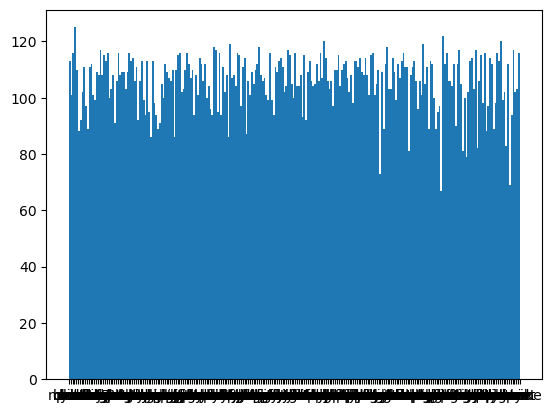

In [27]:
import matplotlib.pyplot as plt 

plt.hist(dataset_parquet.dataset[:, 1], bins=len(dataset_parquet.unique_labels))

## Data augmentation experiment
To augment video data, you would typically need to:

1. Extract the frames from the video file.
2. Apply the image augmentation techniques to each frame.
3. Reassemble the frames back into a video.
-> Try OpenCV?

# Preprocess Data and Create Labels and Features
train_test_split allow us to create a testing and training partition.
- sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]


to_categorial function in keras converts class vector to binary class matrix.
- tf.keras.utils.to_categorical(
    y, num_classes=None, dtype='float32')
    
Create a label map (label dictionary) that represent each sign action.

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [41]:
label_map = {label:num for num, label in enumerate(actions)}

In [42]:
label_map

{'thanks': 0, 'sorry': 1}

Bring all data together and structure. Collected keypoints from each videos, mediapipe has 1662 keypoints (33*4 + 468*3 + 21 * 3 + 21 * 3) per each sequence frame.
Create 1 big array that contains all of our data. Structure is 90 arrays with 30 frames in each of those arrays, each contain 1662 values.

Variables:
- sequence = list that hold all sequence keypoints. Each sequence coresponds to 1 video. 
- Labels = list that hold the labels for each sequence, indicates which actions is performed in each sequence.
- no_sequences = number of sequences (videos) per action. 
- sequence_length = number of frames per sequence processed to extract keypoints. sequence preset to 26 frames per sequence.
- actions = array of stings where each string represents an action
- label_map = dictionary mapping each action string to unique integer.

Loop explanation:
- loop over each actions. For each action: iterate over sequence number. Inside each loop have a window[] to hold all keypoints for the current sequence number (current video)
- iterate over each frame number in the sequence (video), load each .npy file with keypoints, appending it to window list.
- after all frames to sequence added to window[] list, append the window list to sequence[] list, with the corresponding label_map action. Completing sequences, labels = [], [].

At the end: sequences contains a list of all keypoint sequence for each video in the dataset. labels[] contains corresponding action label for the sequence. 

Note that each array represent keypoints extracted from one frame of a video. Structured data ready to use for training ML model.

change such that the batch size is on all category

In [38]:
#change so it should only process up to 500 video clips.
#USE THIS - fixed version
sequences, labels = [], []
sequence_counter = 0  # Initialize a counter for the number of sequences processed

#x = sequences, y = labels.
#action = [thanks, sorry], for loop iterate twice. 
actions = np.array(['thanks', 'sorry'])
for action in actions:
    for sequence in range(no_sequences):
        if sequence_counter >= 500:  # Check if 500 sequences have been processed
            break  # Break out of the inner loop

        window = []
        for frame_num in range(sequence_length):
            try:
                res = np.load(os.path.join(DATA_PATH_ALT, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
            except FileNotFoundError:
                # If there are no more frames, break out of the loop
                break
        
        # Check if the sequence is shorter than 50 frames and pad if necessary
        if len(window) < 50:
            # Calculate how many zero-arrays are needed
            padding_length = 50 - len(window)
            # Create zero-arrays with the same shape as the existing frames
            padding = [np.zeros_like(window[0]) for _ in range(padding_length)]
            # Extend the window with the padding
            window.extend(padding)

        sequences.append(window)
        labels.append(label_map[action])
        sequence_counter += 1  # Increment the sequence counter after each sequence is processed
    print("total loop runs")

print(f"Total sequences processed: {sequence_counter}")
    

total loop runs
total loop runs
Total sequences processed: 200


In [ ]:
#from Parquet files, data preprocessing as input to machine learning

In [39]:
np.array(sequences).shape
#x videos each that is 100 frames each, each have 1662 different keypoints.

(200, 50, 1662)

In [40]:
np.array(sequences).shape

(200, 50, 1662)

In [41]:
np.array(labels).shape

(200,)

Preprocess.
1. Store the sequence as numpy array via x = np.array(sequences)
2. y = to_categorical(labels).astype(int) convert initial label into one-hot encoded representation (binary flag). 100 = how are you, 010 = sorry, 001 = thanks) 
3. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10) test partition is 10% of the data. 
4. Check train and test: x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [42]:
X = np.array(sequences)

In [43]:
X.shape

(200, 50, 1662)

In [40]:
label_encoded = to_categorical(label).astype(int)

NameError: name 'label' is not defined

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [46]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
# First, split into temp training and test sets
X_temp, X_dev, y_temp, y_dev = train_test_split(X, y, test_size=0.10)

# Then, split the temp training set into final training and dev (validation) sets
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.11)

In [47]:
#y_train.shape
X_test.shape

(20, 50, 1662)

In [48]:
X_train.shape, X_test.shape, X_dev.shape

((160, 50, 1662), (20, 50, 1662), (20, 50, 1662))

# Build and Train LSTM Neural Network
import sequential model, LSTM layer and a dense layer.
- sequential: linear stack layer. 
- LSTM: a type of RNN layer to learn dependence in sequence predition problems. Good for time-series data and lag of unknown important events in time-series data.
- dense layer: fully-connected neural network layers. Each neuron in dense layer are used in neural network to perform classification on  features extracted by networks. 
- tensorboard: visualization toolkit to view metrics like loss, accuracy during training process, logging. Visualize model architecture, computation graph etc.

FIGURE OUT THE PROBLEM - try these methods:
1. Fix the learning rate in Adam.
2. Exclude batch size equation
3. Replace categorial entropy to binary entropy (add in categorial once the ML is working correctly).
4. Remove face landmarks

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import backend as K
import tensorflow as tf

TensorBoard: allow to monitor neural network training as IT is BEING TRAINED!

In [50]:
log_dir = os.path.join('Logs_50_changed')
tb_callback = TensorBoard(log_dir=log_dir)

instantiate model as Sequential().
Add 3 sets of LSTM layers:
1. 64 LSTM units. Return sequence is true. Activation function is relu (can change). input shape is 26 frames prediction with 1662 feature set. It is x.shape (don't_care, _,_) value.
2. 2nd LSTM layer with 128 units. return sequence as true. activation function is relu.
3. 3rd LSTM layer with 64 units. return sequence is false, as it is dense layer. (Andrew Ng deep learning specialization).

Final 3 layers are all dense layers:
- activation softmax, return 0-1 probability. return actions shape as output.

In [51]:
# Define a custom loss function
def custom_loss(y_true, y_pred):
    # Calculate the standard categorical crossentropy loss
    loss = K.categorical_crossentropy(y_true, y_pred)
    
    # Multiply by the batch size
    #loss *= K.cast(K.shape(y_true)[0], K.floatx())
    
    return loss

In [52]:
model = Sequential()
#x,y,z -> y,z as the input shape
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(50, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [53]:
#Adam Optimizer - fixed learning rate.
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003) #0.001 can be changed.

In [54]:
res = [.7, 0.2, 0.1]

In [55]:
actions[np.argmax(res)]

'thanks'

Compile model and fit it. 
Specifier optimizer is 'Adam' this can be changed to optimize the model.
Loss = 'categorial_crossentropy' we have multi-class classification model. Therefore, use categorial_crossentropy. 
Metrics = track the accuracy as we train.

Finally fit and train the model (x_train and y_train data) epochs set to 2000.
- Number of epochs: number of times learning algorithm will work through the entire dataset. 2000 = model will run through X_train and y_train data 2000 times, adjusting the weights with each epoch to minimize loss function.
- callback to refer to TensorBoard visualization tools.

In [71]:
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [56]:
#accuracy -> categorial_accuracy as we add more class
model.compile(optimizer=adam_optimizer, loss=custom_loss, metrics=['categorical_accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=2000, validation_data = (X_dev, y_dev), batch_size = 8, callbacks=[tb_callback])

Epoch 1/2000


20/20 [==============================] - 8s 109ms/step - loss: 0.6932 - categorical_accuracy: 0.5000 - val_loss: 0.6937 - val_categorical_accuracy: 0.4000
Epoch 2/2000
20/20 [==============================] - 1s 61ms/step - loss: 0.6930 - categorical_accuracy: 0.5250 - val_loss: 0.6945 - val_categorical_accuracy: 0.4000
Epoch 3/2000
20/20 [==============================] - 1s 60ms/step - loss: 0.6928 - categorical_accuracy: 0.5250 - val_loss: 0.6948 - val_categorical_accuracy: 0.4000
Epoch 4/2000
20/20 [==============================] - 1s 60ms/step - loss: 0.6928 - categorical_accuracy: 0.5250 - val_loss: 0.6951 - val_categorical_accuracy: 0.4000
Epoch 5/2000
20/20 [==============================] - 1s 60ms/step - loss: 0.6929 - categorical_accuracy: 0.5250 - val_loss: 0.6957 - val_categorical_accuracy: 0.4000
Epoch 6/2000
20/20 [==============================] - 1s 62ms/step - loss: 0.6927 - categorical_accuracy: 0.5250 - val_loss: 0.6963 - val_categorical_accuracy: 0.

Epoch 47/2000
20/20 [==============================] - 1s 59ms/step - loss: 0.6914 - categorical_accuracy: 0.5250 - val_loss: 0.7051 - val_categorical_accuracy: 0.4000
Epoch 48/2000
20/20 [==============================] - 1s 59ms/step - loss: 0.6911 - categorical_accuracy: 0.5250 - val_loss: 0.7054 - val_categorical_accuracy: 0.4000
Epoch 49/2000
20/20 [==============================] - 1s 63ms/step - loss: 0.6911 - categorical_accuracy: 0.5250 - val_loss: 0.7073 - val_categorical_accuracy: 0.4000
Epoch 50/2000
20/20 [==============================] - 1s 61ms/step - loss: 0.6907 - categorical_accuracy: 0.5250 - val_loss: 0.7158 - val_categorical_accuracy: 0.4000
Epoch 51/2000
20/20 [==============================] - 1s 60ms/step - loss: 0.6899 - categorical_accuracy: 0.5250 - val_loss: 0.7151 - val_categorical_accuracy: 0.4000
Epoch 52/2000
20/20 [==============================] - 1s 60ms/step - loss: 0.6905 - categorical_accuracy: 0.5250 - val_loss: 0.7043 - val_categorical_accuracy:

Epoch 96/2000
20/20 [==============================] - 1s 60ms/step - loss: 0.6882 - categorical_accuracy: 0.5500 - val_loss: 0.7295 - val_categorical_accuracy: 0.5000
Epoch 97/2000
20/20 [==============================] - 1s 68ms/step - loss: 0.6859 - categorical_accuracy: 0.6125 - val_loss: 0.7114 - val_categorical_accuracy: 0.5000
Epoch 98/2000
20/20 [==============================] - 1s 63ms/step - loss: 0.6855 - categorical_accuracy: 0.5625 - val_loss: 0.7486 - val_categorical_accuracy: 0.4500
Epoch 99/2000
20/20 [==============================] - 1s 60ms/step - loss: 0.6834 - categorical_accuracy: 0.5562 - val_loss: 0.7280 - val_categorical_accuracy: 0.5000
Epoch 100/2000
20/20 [==============================] - 1s 61ms/step - loss: 0.6808 - categorical_accuracy: 0.5938 - val_loss: 0.7270 - val_categorical_accuracy: 0.5000
Epoch 101/2000
20/20 [==============================] - 1s 61ms/step - loss: 0.6797 - categorical_accuracy: 0.6000 - val_loss: 0.7522 - val_categorical_accurac

KeyboardInterrupt: 

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 50, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 596642 (2.28 MB)
Trainable params: 59664

#### Training with Research Paper LSTM Architecture
In the paper "Recognition of Real-time hand gestures using mediapipe holistic and LSTM."
- The LSTM model architecture is made up of 84 neurons with a 30, 1662 input vector, that shall be forwarded into the MLP model which has five layers with corresponding nodes of 84, 56, 28,14 and 7 with a dropout that is having a corresponding rate values of 0.4 in the first, second, third layers and 0.5 in the fourth layer.

They have over 950 of training data and 50 test data on long sequence sign gesture recognition.

1. Test without custom loss function 
2. Test with custom loss function

In [117]:
#Trying out Regularization technique - dropout rate
model_reg = Sequential()
#x,y,z -> y,z as the input shape
model_reg.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(50, 1662)))
model_reg.add(LSTM(64, return_sequences=True, activation='relu'))
model_reg.add(Dropout(0.2))  # Applying 20% dropout after the LSTM hidden layer.
model_reg.add(LSTM(32, return_sequences=False, activation='relu'))
model_reg.add(Dropout(0.2)) 
model_reg.add(Dense(64, activation='relu'))
model_reg.add(Dropout(0.2))  #dropout after dense layer
model_reg.add(Dense(32, activation='relu'))
model_reg.add(Dropout(0.2))  #dropout after dense layer
model_reg.add(Dense(actions.shape[0], activation='softmax'))

In [118]:
res = [.7, 0.2, 0.1]
actions[np.argmax(res)]

'thanks'

In [ ]:
#Adam Optimizer - fixed learning rate.
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #0.001 can be changed.

In [50]:
#Compile classification problem using 'ADAM' optimizer. 
model_reg.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [121]:
model_reg.compile(optimizer=adam_optimizer , loss=custom_loss, metrics=['categorical_accuracy'])

In [122]:
model_reg.fit(X_train, y_train, epochs=1500, validation_data = (X_dev, y_dev), callbacks=[tb_callback])

Epoch 1/1500


KeyError: in user code:

    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\engine\training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\optimizers\optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\optimizers\optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1253, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1345, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1342, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "C:\Users\mered\anaconda3\envs\BSL_Project\Lib\site-packages\keras\src\optimizers\optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable lstm_12/lstm_cell/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.Adam.'


In [52]:
# Display the model architecture
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 128)           916992    
                                                                 
 lstm_7 (LSTM)               (None, 30, 64)            49408     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [ ]:
#save model
# model.save('action_lstm_50.keras')

### Load trained model and perform futher training

In [ ]:
model_trained = load_model('action_lstm_50.keras')

In [ ]:
# Continue training the model
model.fit(train_data, train_labels, 
          validation_data=(validation_data, validation_labels),
          epochs=1000,  # Number of epochs to train for
          batch_size=32)  # Batch size

## Make Predictions

In [81]:
res = model.predict(X_test)

1/1 [==============================] - 1s 586ms/step


In [103]:
res_reg = model_reg.predict(X_test)

1/1 [==============================] - 1s 711ms/step


In [82]:
actions[np.argmax(res[0])]

'thanks'

In [83]:
actions[np.argmax(y_test[0])]

'thanks'

In [104]:
model_reg.save('saved_ML_Model/action_lstm_reg_50.keras')

In [69]:
#save the model
model.save('action_lstm_50.keras')

In [105]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [85]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [106]:
yhat = model_reg.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [107]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(ytrue)
len(yhat)

[0, 1, 0, 0, 0, 1, 0, 1, 0, 1]


10

In [108]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 1],
        [5, 1]],

       [[1, 5],
        [1, 3]]], dtype=int64)

In [109]:
accuracy_score(ytrue, yhat)

0.4

### Test in Real Time

In [74]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv.putText(output_frame, actions[num], (0, 85+num*40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv.LINE_AA)
        
    return output_frame

In [75]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [76]:
sequence.reverse()
len(sequence)

AttributeError: 'int' object has no attribute 'reverse'

In [ ]:
sequence.append('def')
sequence.reverse()

In [77]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [87]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
new_width = 680
new_height = 480

cap = cv.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        resized_frame = cv.resize(frame, (new_width, new_height))

        # Make detections
        image, results = mediapipe_detection(resized_frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv.putText(image, ' '.join(sentence), (3,30), 
                       cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
        
        # Show to screen
        cv.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============

1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'media

1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
sorry
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
sorry
<class 'mediapip

1/1 [==============================] - 0s 26ms/step
thanks
